In [6]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

In [ ]:


def detect_inclination(F, theta1, theta2, objective_function):
    """
    Detects the inclination angle of an image based on horizontal projection.

    Parameters:
        F (numpy.ndarray): Input image as a 2D array.
        theta1 (int): Starting angle for the search.
        theta2 (int): Ending angle for the search.
        objective_function (callable): Function to compute the objective value for a given profile.

    Returns:
        float: Detected inclination angle θM.
    """
    # Step 2: Number of rows in the image
    n = F.shape[0]

    # Step 3-5: Compute the horizontal projection profile
    Perfil = np.sum(F, axis=1)

    # Step 6-8: Evaluate the objective function for each angle
    valor = {}
    for theta in range(theta1, theta2 + 1):
        valor[theta] = objective_function(Perfil, theta)

    # Step 9: Find the angle with the maximum objective value
    thetaM = max(valor, key=valor.get)

    # Step 10: Return the detected angle
    return thetaM

In [62]:
# Carregar a imagem em escala de cinza
nome = "neg_28"
imagem = cv2.imread(f'images/{nome}.png', cv2.IMREAD_GRAYSCALE)
imagem = imagem.astype(np.float32)

# Calcular a projeção horizontal (soma das intensidades ao longo das linhas)
projecao_horizontal = cv2.reduce((255-imagem), dim=1, rtype=cv2.REDUCE_SUM)


In [ ]:
imagem_r = cv2.rotate(imagem, 28)
projecao_horizontal_r = cv2.reduce((255-imagem_r), dim=1, rtype=cv2.REDUCE_SUM)

#TALVEZ USAR PIL PARA ROTACIONAR A IMAGEM

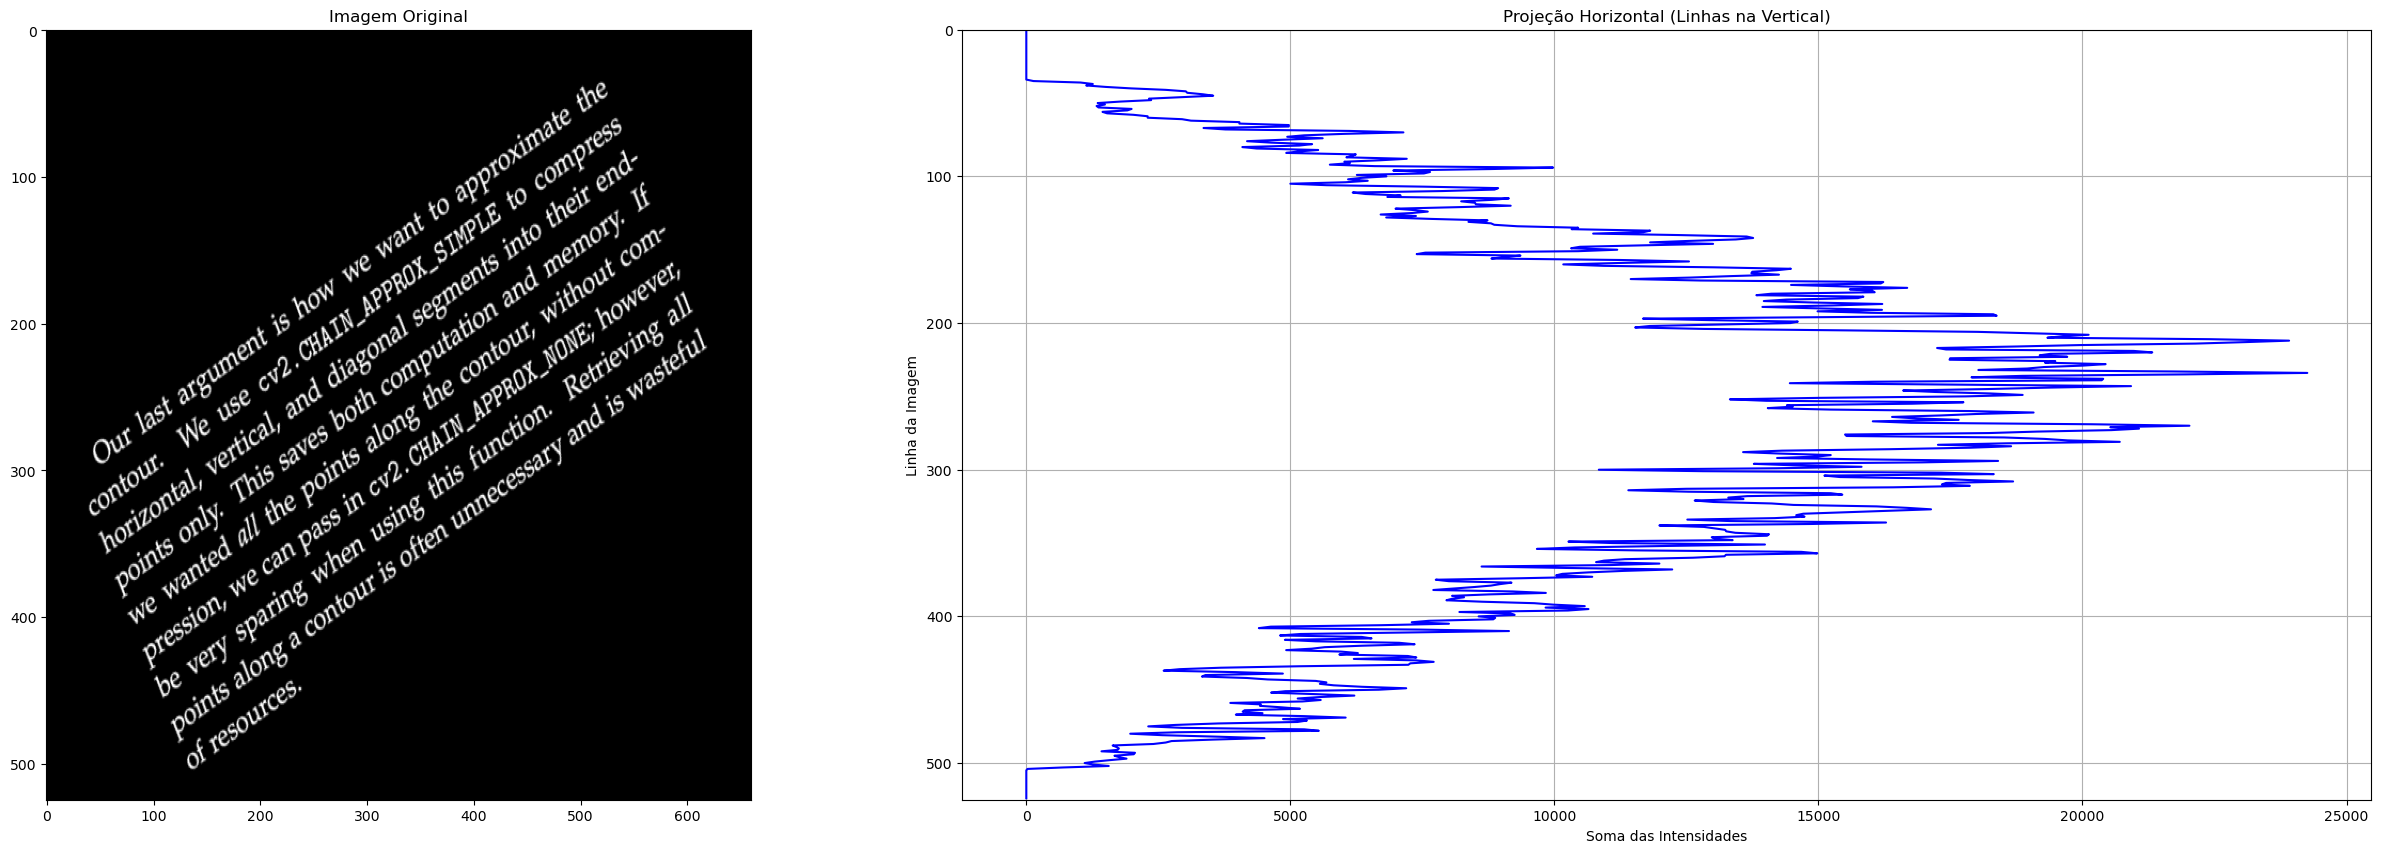

In [63]:

# Criar um layout com dois gráficos lado a lado
fig, axes = plt.subplots(1, 2, figsize=(30, 10), gridspec_kw={'width_ratios': [1, 2]})

# Plotar a imagem original à esquerda
axes[0].imshow((255-imagem), cmap='gray', aspect='auto')  # Mantém a proporção original da imagem
axes[0].set_title('Imagem Original')
# axes[0].axis('off')  # Remove os eixos da imagem

# Plotar a projeção horizontal à direita
axes[1].plot(projecao_horizontal, range(len(projecao_horizontal)), color='blue')
axes[1].set_title('Projeção Horizontal (Linhas na Vertical)')
axes[1].set_ylabel('Linha da Imagem')
axes[1].set_xlabel('Soma das Intensidades')

# Garantir que o eixo Y seja invertido
axes[1].set_ylim(0, imagem.shape[0])  # Define os limites do eixo Y
axes[1].invert_yaxis()  # Inverte o eixo Y para alinhar com a imagem

# Adicionar grade
axes[1].grid()

# Exibir o resultado
# plt.tight_layout()
plt.show()